# Colaboratoryで実行する場合
以下を実行して、外部ファイルをダウンロードしてください。   
**このセルはColaboratoryを起動するたびに必要となります**

In [ ]:
##################################
### Colaboratoryのみ以下を実行 ###
##################################
import sys
if 'google.colab' in sys.modules:
    !wget -P ./text http://www.hal.t.u-tokyo.ac.jp/~yamakata/lecture/mediaproc/mediaproc4/novels_miyazawa_wakati.json


# 第4回課題：tf-idfを使って「風の又三郎」の重要語を抽出しよう

## 入力データの説明

`text/novels_miyazawa_wakati.json`には、宮沢賢治の全小説の分かち書き文がjson形式で記録されています。   
記録形式は以下の通りです。

```
[
    {
        "author": "宮沢賢治",
        "title": "『春と修羅』",
        "text": "目次 \n『 春 と 修羅 』 \n春 と...(本文続く）
    },
    ...
]
```
`title`が`風の又三郎`であるような要素の`text`の値には「風の又三郎」の本文の分かち書き文が納められています。

## 課題１：tf-idfモデルの学習

宮沢賢治の全作品を使って、各作品を1文書としたときのtf-idfを学習してください。   
tf-idfの学習には、`sklearn.feature_extraction.text`の`TfidfVectorizer`を使ってください。   
ここで、TfidfVectorizerのパラメータは以下のようにしてください。
-    max_features=1000 (語彙サイズは最大1000個)
-    max_df=5　（5つ以下の小説までに現れる語彙）
-    min_df=3　（3つ以上の小説に現れる語彙）

## 課題２：「風の又三郎」の重要語の抽出

小説「風の又三郎」のtf-idf値が大きい単語上位10単語とそのtf-idf値を、   
各行にカンマ区切りで単語とtf-idf値が並んだ形式で、ex4-tfidf.txtという名前のファイルに出力してください。

## ヒント

`TfidfVectorizer`には、各要素が1つの小説の本文全体（単語が半角空文字で区切られた分かち書き文）であるようなリストを渡します。   
今回入力とするjsonファイルには249作品が納められているので、`TfidfVectorizer`に渡す行列は249個の要素を持つベクトルということになります。   
このようなリストは以下のプログラムで作成することができます。

以下のプログラムでは、

1. `text/novels_miyazawa_wakati.json`の本文（jsonファイルを辞書として読み込んだ時の各要素のキーが`text`）を読み込み
'\n'を空白に置換（replace('\n', ' '))した後で、`wakati`という名前のリストに追加(append)しています。   
つまり、`wakati`の$i$番目の要素は、$i$番目に登録されている小説の本文（全文の分かち書き文）というわけです。   
`novels_miyazawa_wakati.json`には249作品が納められているので、このリストは249次元となります。   

2. また同時に、`novels_miyazawa_wakati.json`において、ある作品名の小説が何番目に登録されているかを返す辞書`title2ID`を生成しています。   
つまり、`title2ID['作品名'] = [登場順]`です。   
たとえば「風の又三郎」は0番目から数えて237番目に現れるので、  
    `title2ID['風の又三郎'] = 237`  
となります。


In [1]:
############################################
### このセルは変更しないでください！！！ ###
############################################

import json
import numpy as np

file = 'text/novels_miyazawa_wakati.json'

with open(file, 'r', encoding='utf-8') as fi:
    novels = json.load(fi)

print('小説の数:', len(novels))

wakati = []
num = 0
title2ID = {}
for novel in novels:
    wakati.append(novel['text'].replace('\n',' ')) 
    title2ID[novel['title']] = num
    num += 1
    
print(title2ID['風の又三郎'])


小説の数: 249
237


## 課題１：tf-idfモデルの学習

以下にtf-idfを学習するプログラムを書いてください。   
上のヒントを使ってもいいし使わなくてもいいです。

In [2]:
corpus = np.array(wakati)

for c in corpus:
    print(c[0:50])

print([len(v) for v in corpus]) 


目次  『 春 と 修羅 』  春 と 修羅  屈折 率  くら かけ の 雪  日輪 と 太 市 
目次  『 春 と 修羅 』 補遺  手簡  厨川 停車場  青森 挽歌 　 三  津軽海峡  駒ヶ
イーハトヴ は 一つ の 地名 で ある 。 強 て 、 その 地点 を 求 むるならばそれは 、 
わたし たち は 、 氷砂糖 を ほしい くらい もた ない でも 、 きれい に すきとおっ た 
イーハトヴ は 一つ の 地名 で ある 。 しい て 、 その 地点 を 求む る なら ば 、 
々 として ひか れる は  硫黄 ヶ 岳 の 尾根 の 雪  雲 灰 白 に 亙 せる は  鳥ヶ








せ な うち 痛み 息 熱く  待合室 を わ が 得る や  白き 羽 せ し 淫 れ め の  



ながれ たり  夜 は あやしく 陥り て  ゆらぎ 出 でし は 一 むら の  陰極線 の 盲 





りんご のみ き の は ひ の ひかり  腐植 の しめり の つ ち に 立て り  根 ぎはの

われ は ダルケ を 名乗 れる もの と  つめたく 最後 の わかれ を 交 は し  閲覧 室
われ ら が 書 に 順 ひ て  その 三 稜 の 壇 に 立ち  クラリネット と オボー も 



（ 二川 こ ゝ にて 会し たり ）  （ い な 、 和賀 の 川 水 雪 代 ふ  夏 油 の





弓 の ごとく  鳥 の ごとく  昧爽 の 風 の 中 より  家 に 帰り 来れ り  


棕梠 の 葉 や ゝ に 痙攣 し  陽光 横目 に 過 ぐる ころ  湯屋 に は 声 の ほのか



たい エゴイスト だ 。 た ゞ 神 のみ 名 による エゴイスト だ と 、 君 は もう 一遍 


雨 ニモマケズ  風 ニモマケズ  雪 ニモ 夏 ノ 暑 サニモマケヌ  丈夫 ナカラダヲモチ  慾




霧 降る 萱 の 細 みち に  われ を いぶかり 腕 組める  な は たくましき 漢 子 か 




おれ は その 時 その 青黒く 淀ん だ 室 の 中 の 堅い 灰色 の 自分 の 席 に そわそ
苔 いち めん に 、 霧 が ぽし ゃぽしゃ 降っ て 、 蟻 の 歩哨 は 鉄 の 帽子

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, max_df=5, min_df=3)
X = vectorizer.fit_transform(corpus)

X.shape

(249, 3219)

In [4]:
feature_names = vectorizer.get_feature_names() # 10,000種類の単語のリストを獲得します

print('単語ID:\t表記')
for i in range(200, 210):
    print(i, ':\t', feature_names[i])

単語ID:	表記
200 :	 かから
201 :	 かがみ
202 :	 かがやかし
203 :	 かくす
204 :	 かぐ
205 :	 かけよ
206 :	 かけ込ん
207 :	 かこ
208 :	 かご
209 :	 かさかさ


In [5]:
title = list(title2ID.keys())
for w in ['かがみ','かくす','かけ込ん','かさかさ']:
    ID = feature_names.index(w)
    print('ID: ', ID, '単語：', feature_names[ID])
    for t in range(0, len(title)):
        print('{0:>10}: {1:.4f}'.format(title[t], float(X[t,ID])))
    print()

ID:  201 単語： かがみ
    『春と修羅』: 0.0188
  『春と修羅』補遺: 0.0000
『注文の多い料理店』広告文: 0.0000
『注文の多い料理店』序: 0.0000
『注文の多い料理店』新刊案内: 0.0000
〔※［＃「日＋令」、第3水準1-85-18］々としてひかれるは〕: 0.0000
〔あくたうかべる朝の水〕: 0.0000
〔いざ渡せかし　おいぼれめ〕: 0.0000
   〔かくまでに〕: 0.0000
〔くもにつらなるでこぼこがらす〕: 0.0000
〔このみちの醸すがごとく〕: 0.0000
〔こはドロミット洞窟の〕: 0.0000
  〔こんにやくの〕: 0.0000
〔こゝろの影を恐るなと〕: 0.0000
〔せなうち痛み息熱く〕: 0.0000
〔そのかたち収得に似て〕: 0.0000
〔たゞかたくなのみをわぶる〕: 0.0000
〔つめたき朝の真鍮に〕: 0.0000
   〔ながれたり〕: 0.0000
〔なべてはしけく　よそほひて〕: 0.0000
〔ひとひははかなくことばをくだし〕: 0.0000
〔まひるつとめにまぎらひて〕: 0.0000
〔ま青きそらの風をふるはし〕: 0.0000
〔ゆがみつゝ月は出で〕: 0.0000
〔りんごのみきのはひのひかり〕: 0.0000
〔われかのひとをこととふに〕: 0.0000
〔われはダルケを名乗れるものと〕: 0.0000
〔われらが書に順ひて〕: 0.0000
〔われらひとしく丘に立ち〕: 0.0000
〔われ聴衆に会釈して〕: 0.0000
  〔モザイク成り〕: 0.0000
〔二川こゝにて会したり〕: 0.0000
〔卑屈の友らをいきどほろしく〕: 0.0000
〔土をも掘らん汗もせん〕: 0.0000
〔夕陽は青めりかの山裾に〕: 0.0000
〔島わにあらき潮騒を〕: 0.0000
〔廿日月かざす刃は音無しの〕: 0.0000
   〔弓のごとく〕: 0.0000
〔最も親しき友らにさへこれを秘して〕: 0.0000
〔月光の鉛のなかに〕: 0.0000
〔棕梠の葉やゝに痙攣し〕: 0.0000
〔洪積の台のはてなる〕: 0.0000
〔甘藍の球は弾けて〕: 0.0000
    〔聖なる窓〕: 0.0000
   〔蒼冷と純黒〕: 0.0000
〔郡

       職員室: 0.0000
      花壇工作: 0.0000
  花巻農学校精神歌: 0.0000
       花椰菜: 0.0000
      若い木霊: 0.0000
     茨海小学校: 0.0000
       葡萄水: 0.0000
     虔十公園林: 0.0000
虹の絵の具皿 （十力の金剛石）: 0.0000
     蛙のゴム靴: 0.0000
 蜘蛛となめくじと狸: 0.0000
      製炭小屋: 0.0000
        訓導: 0.0000
      詩ノート: 0.0000
        講後: 0.0000
         谷: 0.0000
       貝の火: 0.0000
         車: 0.0000
      農学校歌: 0.0000
   農民芸術の興隆: 0.0000
    農民芸術概論: 0.0000
  農民芸術概論綱要: 0.0000
     遊園地工作: 0.0000
   釜石よりの帰り: 0.0000
    銀河鉄道の夜: 0.0000
        開墾: 0.0000
       開墾地: 0.0000
       隅田川: 0.0000
        隼人: 0.0000
      雁の童子: 0.0000
        雪峡: 0.0000
       雪渡り: 0.0000
      雹雲砲手: 0.0000
        電車: 0.0000
   青柳教諭を送る: 0.0000
     革トランク: 0.0000
     風の又三郎: 0.0000
     風野又三郎: 0.0197
   饑餓陣営 一幕: 0.0000
        饗宴: 0.0000
        駅長: 0.0000
   鳥をとるやなぎ: 0.0000
鳥箱先生とフウねずみ: 0.0000
  鹿踊りのはじまり: 0.0000
   黄いろのトマト: 0.0000
      黒ぶだう: 0.0000
      龍と詩人: 0.0000
HUMAN LOST: 0.0000



In [6]:
dic = {}
for t in title:
    # 単語とそのtf-idf値の対を辞書として登録
    pair = dict(zip(feature_names, X[title.index(t),:].toarray()[0]))
    # tf-idfの高い順にソートして、単語とtf-idfの対をタプルとしてリスト化し、辞書に代入する
    dic[t] = [(x, pair[x]) for x in sorted(pair, key=lambda x:-pair[x])]

In [32]:
for t in title:
    print(t, dic[t][:20])
    print()

『春と修羅』 [('風景', 0.2884872990035924), ('修羅', 0.2604181861212075), ('火口', 0.21636547425269428), ('提灯', 0.18030456187724522), ('軋り', 0.15625091167272448), ('むか', 0.15079635501005295), ('さくら', 0.12621319331407166), ('真空', 0.12621319331407166), ('外輪山', 0.11309726625753971), ('薬師', 0.11309726625753971), ('過去', 0.10818273712634714), ('ぱい', 0.10416727444848299), ('グランド', 0.09015228093862261), ('小岩井', 0.09015228093862261), ('幻想', 0.09015228093862261), ('本部', 0.08680606204040249), ('薔薇', 0.08680606204040249), ('あかく', 0.07539817750502648), ('うつくし', 0.07539817750502648), ('なにもかも', 0.07539817750502648)]

『春と修羅』補遺 [('堕ち', 0.3700548690516808), ('燈台', 0.25791048964468055), ('自殺', 0.25791048964468055), ('青森', 0.25791048964468055), ('津軽海峡', 0.24670324603445384), ('たのし', 0.1850274345258404), ('信号', 0.1850274345258404), ('in', 0.12895524482234028), ('the', 0.12895524482234028), ('信じ', 0.12895524482234028), ('委員', 0.12895524482234028), ('いるか', 0.12335162301722692), ('偶然', 0.12335162301722692), ('呼子', 0.1233

In [7]:
print('風の又三郎', dic['風の又三郎'][:10])

風の又三郎 [('一郎', 0.9150588103708048), ('どど', 0.20334640230462328), ('きのう', 0.13217516149800515), ('さいかち', 0.11692121634346023), ('悦治', 0.095662813371922), ('発破', 0.08133856092184931), ('くちびる', 0.07440441040038379), ('土手', 0.07117124080661816), ('教壇', 0.06377520891461468), ('ありゃ', 0.05314600742884556)]


In [8]:
list_1 = dic['風の又三郎'][:10]
strr = ''
for item in list_1:
    str_1 = item[0] + ',' + "%.3f" %item[1] + '\n'
    strr += str_1

In [9]:
with open('ex4-tfidf.txt', 'w', encoding='utf-8') as f:
    f.write(strr)
    f.close()

## 課題２：「風の又三郎」の重要語の抽出

小説「風の又三郎」のtf-idf値が大きい単語上位10単語とそのtf-idf値を、   
**各行にカンマ区切りで単語とtf-idf値が並んだ形式で、`ex4-tfidf.txt`という名前のファイルに出力**してください。

ex4-tfidf.txt`有効数字4桁は以下のようにります。
```
一郎,0.925
どど,0.206
きのう,0.134
さいかち,0.118
悦治,0.097
発破,0.082
くちびる,0.075
土手,0.072
教壇,0.064
ありゃ,0.054
```

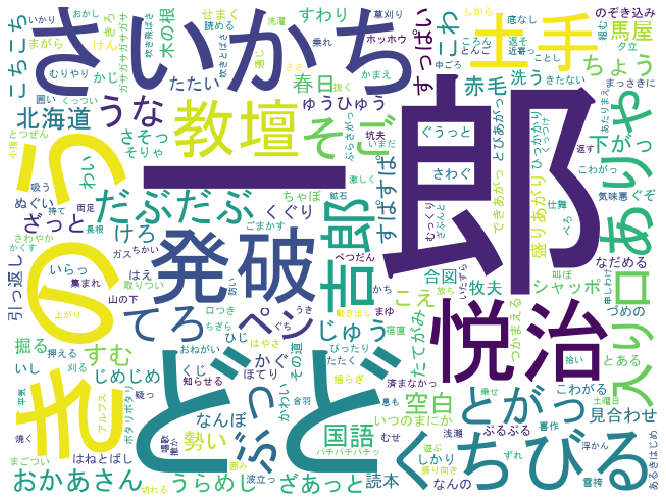

In [53]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

t = title[237] # ここをtitle[i]に書き換えてみましょう

wordfreq = {w[0]:w[1] for w in dic[t]}

wc = WordCloud(background_color="white",
    font_path="C:\Windows\Fonts\msgothic.ttc", # Windows
    width=640,height=480).generate_from_frequencies(wordfreq)
plt.figure(figsize=(12,9))
plt.imshow(wc)
plt.axis("off")
plt.savefig('fig/TopicAnalysis1-1.png') 